# Meteorological Data Evaluation (ERDDAP)

## Data Description

Data is ingested to ERDDAP from ecoraid archive.  Timestamps have been converted to CF from EPIC, some history is maintained currently from global variables

Known issues with solar data for ***xxxx years***

In [21]:
#basic ingest and setup

from erddapy import ERDDAP
import pandas as pd
import numpy as np
import datetime

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import (YearLocator, WeekdayLocator, MonthLocator, 
                                DayLocator, HourLocator, DateFormatter)

'-----------------------------------------------------------------------------'

### specify primary bulk figure parameters
fontsize = 10
labelsize = 10
#plotstyle = 'seaborn'
max_xticks = 10
plt.style.use('seaborn-ticks')
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['ps.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['pdf.fonttype'] = 42 #truetype/type2 fonts instead of type3
mpl.rcParams['axes.grid'] = False
mpl.rcParams['axes.edgecolor'] = 'black'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.labelcolor'] = 'black'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['grid.linestyle'] = '--'
mpl.rcParams['xtick.major.size'] = 4
mpl.rcParams['xtick.minor.size'] = 2
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['xtick.minor.width'] = 0.5
mpl.rcParams['ytick.major.size'] = 4
mpl.rcParams['ytick.minor.size'] = 2
mpl.rcParams['ytick.major.width'] = 2
mpl.rcParams['ytick.minor.width'] = 0.5
mpl.rcParams['ytick.direction'] = 'out'
mpl.rcParams['xtick.direction'] = 'out'
mpl.rcParams['ytick.color'] = 'black'
mpl.rcParams['xtick.color'] = 'black'

In [22]:
server_url = 'http://downdraft.pmel.noaa.gov:8080/erddap'

## M2

In [23]:
e = ERDDAP(server=server_url)
search_for = ['Meteorological', '-itae', '-alamo', '-fsu', '-cwwc', '-Gtspp']
df = pd.read_csv(e.get_search_url(response='csv', search_for=(' '.join(search_for))))

print(df['Dataset ID'].values)

['datasets_Met_00bsm2a_final' 'datasets_Met_04bsm2a_final'
 'datasets_Met_05bsm2a_final' 'datasets_Met_06bsm2a_final'
 'datasets_Met_07bsm2a_final' 'datasets_Met_08bsm2a_final'
 'datasets_Met_09bsm2a_final' 'datasets_Met_10bsm2a_final'
 'datasets_Met_11bsm2a_final' 'datasets_Met_13bsm2a_final'
 'datasets_Met_14bsm2a_final' 'datasets_Met_15bsm2a_final'
 'datasets_Met_15bsm2a_NRT' 'datasets_Met_16bsm2a_final'
 'datasets_Met_16bsm2a_NRT' 'datasets_Met_17bsm2a_final'
 'datasets_Met_17bsm2a_NRT' 'datasets_Met_18bsm2a_final'
 'datasets_Met_18bsm2a_NRT' 'datasets_Met_19bsm2a_NRT'
 'datasets_Met_20bsm2a_NRT' 'datasets_Met_95bsm2a_final']


In [42]:
from requests.exceptions import HTTPError

dfs = {}
for dataset_id in sorted(df['Dataset ID'].values):
    #print(dataset_id)
    if dataset_id in ['datasets_Met_18bsm2a_NRT','datasets_Met_17bsm2a_NRT','datasets_Met_16bsm2a_NRT','datasets_Met_15bsm2a_NRT']:
        continue
    try:
        d = ERDDAP(server=server_url,
            protocol='tabledap',
            response='csv'
        )
        d.dataset_id=dataset_id
    except HTTPError:
        print('Failed to generate url {}'.format(dataset_id))

    try:
        df_m = d.to_pandas(
                    index_col='time (UTC)',
                    parse_dates=True,
                    skiprows=(1,)  # units information can be dropped.
                    )
        df_m.sort_index(inplace=True)
        df_m.columns = [x[1].split()[0] for x in enumerate(df_m.columns)]

        dfs.update({dataset_id:df_m})
    except:
        pass


In [43]:
#merge dataframes
dfsorted = pd.concat(dfs.values())
dfsorted

,altitude,latitude,longitude,air_temperature,air_pressure,WD_410,Teq_1800,battery_voltage,relative_humidity,solar_radiation,northward_wind,compass_direction,wind_speed,eastward_wind,timeseries_id,wind_direction,azimuth
time (UTC),,,,,,,,,,,,,,,,,
2000-04-25 01:00:00+00:00,0.0,56.8800,164.0582,-2.70,1017.7,172.0,-0.3,14.9,NaN,306.000000,-6.139662,116.0,6.2,0.862873,00bsm2a_wpak,NaN,NaN
2000-04-25 02:00:00+00:00,0.0,56.8800,164.0582,-2.70,1017.9,189.0,-0.4,14.9,NaN,129.199997,-6.617512,164.0,6.7,-1.048111,00bsm2a_wpak,NaN,NaN
2000-04-25 03:00:00+00:00,0.0,56.8800,164.0582,-2.40,1018.1,194.0,-0.4,14.8,NaN,81.599998,-5.821775,133.0,6.0,-1.451531,00bsm2a_wpak,NaN,NaN
2000-04-25 04:00:00+00:00,0.0,56.8800,164.0582,-1.70,1018.2,189.0,-0.4,14.9,NaN,54.400002,-6.419974,123.0,6.5,-1.016824,00bsm2a_wpak,NaN,NaN
2000-04-25 05:00:00+00:00,0.0,56.8800,164.0582,-1.80,1018.3,191.0,-0.3,14.8,NaN,27.200001,-7.067716,149.0,7.2,-1.373825,00bsm2a_wpak,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995-09-07 18:00:00+00:00,0.0,56.6033,164.6333,11.04,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95bsm2a_wpak,NaN,NaN
1995-09-07 19:00:00+00:00,0.0,56.6033,164.6333,11.61,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95bsm2a_wpak,NaN,NaN
1995-09-07 20:00:00+00:00,0.0,56.6033,164.6333,12.18,1002.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95bsm2a_wpak,NaN,NaN


(728049.0, 737425.0)

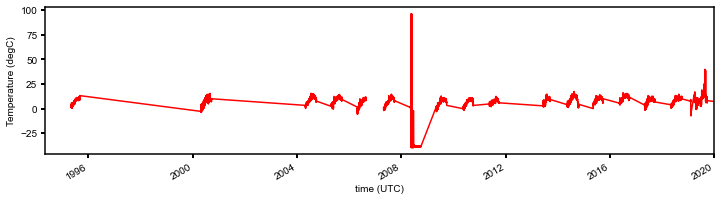

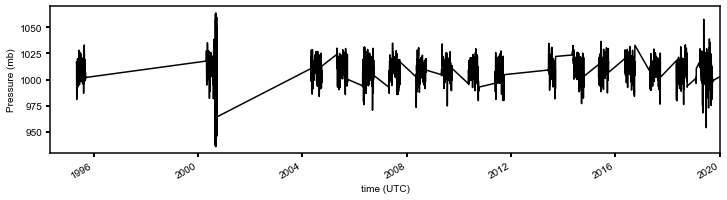

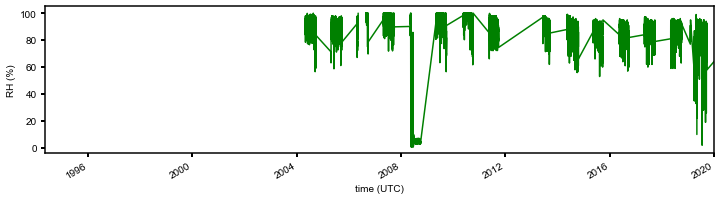

In [51]:
#matplotlib plots

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_temperature.plot(ax=ax,color='r')
plt.ylabel('Temperature (degC)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])


fig, ax = plt.subplots(figsize=(12,3))
dfsorted.air_pressure.plot(ax=ax,color='k')
plt.ylabel('Pressure (mb)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])

fig, ax = plt.subplots(figsize=(12,3))
dfsorted.relative_humidity.plot(ax=ax,color='g')
plt.ylabel('RH (%)')
plt.xlim([datetime.datetime(1994,5,1),datetime.datetime(2020,1,1)])


In [ ]:
fig, ax = plt.subplots(figsize=(12,3))
for ds, df in dfs.items():
    try:
        df.wind_speed.plot(ax=ax)
        plt.ylabel('wind_speed (m/s)')
    except:
        pass
wdf.WS.plot(ax=ax)
plt.xlim([datetime.datetime(2017,5,1),datetime.datetime(2017,10,15)])

fig, ax = plt.subplots(figsize=(12,3))
for ds, df in dfs.items():
    try:
        df.wind_from_direction.plot(style='.',markersize=3.0,ax=ax)
        plt.ylabel('wind direction (degree)')
    except:
        pass
wdf.WD.plot(style='.',markersize=4.0,ax=ax)
plt.xlim([datetime.datetime(2017,5,1),datetime.datetime(2017,10,15)])

AttributeError: 'list' object has no attribute 'values'